In [1]:
from lmf import lmf

/home/srr70/.local/lib/python2.7/site-packages/subprocess32.py:472: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 5 lmf -vnit=100 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 5 lmf -vnit=100 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 5 lmf -vnit=100 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 5 lmf -vnit=100 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
running mpirun -np 1 lmfa ctrl.temp......
done

running cp basp0.temp basp.temp......
done

running mpirun -np 5 lmf -vnit=100 --wforce=force --wpos=pos temp>output......
done

Calculation Converged
(9.13

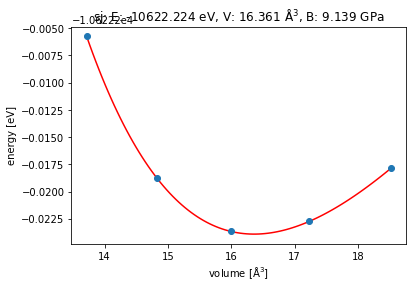

In [2]:
def test():
    import numpy as np
    from ase.io import read
    from ase.units import kJ
    from ase.eos import EquationOfState
    from ase import Atoms
    from ase.io.trajectory import Trajectory
    % matplotlib inline
    
    a = 4.0  # approximate lattice constant
    b = a / 2
    ag = Atoms('Ag',
               cell=[(0, b, b), (b, 0, b), (b, b, 0)],
               pbc=1,
               calculator=lmf())  # use EMT potential
    cell = ag.get_cell()
    traj = Trajectory('Ag.traj', 'w')
    for x in np.linspace(0.95, 1.05, 5):
        ag.set_cell(cell * x, scale_atoms=True)
        ag.get_potential_energy()
        traj.write(ag)
    

    configs = read('Ag.traj@0:5')  # read 5 configurations
    # Extract volumes and energies:
    volumes = [ag.get_volume() for ag in configs]
    energies = [ag.get_potential_energy() for ag in configs]
    eos = EquationOfState(volumes, energies)
    v0, e0, B = eos.fit()
    print(B / kJ * 1.0e24, 'GPa')
    eos.plot('Ag-eos.png')


test()